# Basic Setup and Installations

In [40]:
# use pytorch to build a convolutional neural network
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torch import optim
from torch.utils.data import Dataset, DataLoader
from torchvision.io import read_image
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torchmetrics import Accuracy, Precision, F1Score

import itertools
# from pyimagesearch import config
from imutils import paths
import pandas as pd
import numpy as np
import shutil
import matplotlib.pyplot as plt

In [41]:
# use GPUs if available
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [42]:
CURRENT_DATASET_PATH = "dataset-for-classification"

In [43]:
# build the dataset
df = pd.read_csv('training_set.csv', index_col=0)
df

,nose_scaled_x,nose_scaled_y,nose_score,left_eye_scaled_x,left_eye_scaled_y,left_eye_score,right_eye_scaled_x,right_eye_scaled_y,right_eye_score,left_ear_scaled_x,...,right_knee_scaled_x,right_knee_scaled_y,right_knee_score,left_ankle_scaled_x,left_ankle_scaled_y,left_ankle_score,right_ankle_scaled_x,right_ankle_scaled_y,right_ankle_score,pose
./dataset-for-classification/paripurna-navasana/7ef89ad4433e9e5af2218d2c870845a44f994b18a123852e79c585f77bdc1488.png,0.558346,0.041068,1.949889,0.540620,0.001027,1.943505,0.512555,0.000000,2.750488,0.304284,...,0.985229,0.465092,0.057829,0.995569,0.407598,0.091656,1.000000,0.407598,0.083489,38
./dataset-for-classification/padmasana/2ba9fd144da5dee7636bac100b1961875f69e66e0e4007ceba31ea32d40ff0b5.jpeg,0.491987,0.032258,1.857787,0.540064,0.001536,1.265977,0.448718,0.000000,1.498770,0.599359,...,0.067308,0.983103,0.143049,0.474359,0.955453,0.138958,0.330128,0.826421,0.221899,37
./dataset-for-classification/upavistha-konasana/105c894c324470bffd7517867d5ac97db8dd8765bd787b0c4b36f1aadf069c1e.png,0.596422,0.031532,0.972064,0.638171,0.000000,1.963699,0.554672,0.000000,4.430774,0.681909,...,0.053678,1.000000,0.042947,0.675944,1.000000,0.078737,0.000000,0.898649,0.047240,60
./dataset-for-classification/marjaryasana/8dc6474628fdf057f89bc360f1275070ae7bf5b4b17433c50543e663ee26680a.png,0.972571,0.205837,0.270333,0.989714,0.168971,0.216276,0.965714,0.168971,0.173521,0.942857,...,0.366857,0.304147,0.328321,0.413714,0.960061,0.116407,0.000000,0.906298,0.208869,33
./dataset-for-classification/urdhva-prasarita-eka-padasana/157976074d7a676da7623d971725c399ec46656350936d278bf46eb09a775475.png,0.568889,0.785776,0.601770,0.724444,0.822203,0.106847,0.760000,0.821336,0.153943,0.826667,...,0.000000,0.202082,0.167313,0.053333,0.884649,0.429937,0.035556,0.000000,0.297149,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
./dataset-for-classification/adho-mukha-vrksasana/e160e25b7e8bea91a6f1d5cf4914a667a5f9b03bc12bbe791fe3ab7d569cfe14.png,1.000000,0.787596,0.249642,0.723926,0.751062,0.069631,0.797546,0.751912,0.249675,0.116564,...,0.564417,0.225149,0.167277,0.570552,1.000000,0.087273,0.404908,0.000000,0.144229,2
./dataset-for-classification/chaturanga-dandasana/ced03afa1c06fb3cd419e700dbe7357c83ca0b9d28785d240ab5a0e4024633df.png,0.535976,0.797297,0.193930,0.007342,0.483108,0.220233,0.000000,0.479730,0.024991,0.024963,...,1.000000,0.290541,0.029234,0.493392,0.956081,0.162056,0.490455,0.969595,0.166776,19
./dataset-for-classification/utthita-parsvakonasana/194d700849c2954d3fa3135214fb5fc5c843836cdeba24a804f880ec477746da.png,0.142606,0.252717,0.332290,0.147887,0.240489,0.207598,0.077465,0.240489,0.511607,0.061620,...,0.105634,0.650815,0.174187,0.063380,0.998641,0.279461,0.058099,1.000000,0.481291,70
./dataset-for-classification/supta-baddha-konasana/e06ef7b69d0c200b15de610cec58147925918eca05ba9c65966901aadcbccef8.png,0.046092,0.067285,0.932778,0.025050,0.060325,0.471865,0.011022,0.125290,0.693817,0.000000,...,0.986974,0.000000,0.242699,1.000000,0.656613,0.180462,0.995992,0.631090,0.305968,53


In [44]:
classes = df['pose'].unique()
len(classes)

82

# Building a Custom Dataset

In [45]:
classes = [
    'adho-mukha-svanasana',
    'adho-mukha-vriksasana',
    'adho-mukha-vrksasana',
    'ananda-balasana',
    'anjaneyasana',
    'ardha-chandrasana',
    'ardha-matsyendrasana',
    'ardha-pincha-mayurasana',
    'ardha-uttanasana',
    'astavakrasana',
    'baddha-konasana',
    'bakasana',
    'balasana',
    'bharadvajasana-i',
    'bhujangasana',
    'bhujapidasana',
    'bitilasana',
    'camatkarasana',
    'chakravakasana',
    'chaturanga-dandasana',
    'dandasana',
    'dhanurasana',
    'dwi-pada-viparita-dandasana',
    'eka-pada-koundinyanasana-i',
    'eka-pada-koundinyanasana-ii',
    'eka-pada-rajakapotasana',
    'eka-pada-rajakapotasana-ii',
    'garudasana',
    'gomukhasana',
    'halasana',
    'kapotasana',
    'makarasana',
    'malasana',
    'marjaryasana',
    'matsyasana',
    'mayurasana',
    'natarajasana',
    'padmasana',
    'paripurna-navasana',
    'parivrtta-trikonasana',
    'parsva-bakasana',
    'pasasana',
    'paschimottanasana',
    'phalakasana',
    'prasarita-padottanasana',
    'purvottanasana',
    'salabhasana',
    'salamba-bhujangasana',
    'salamba-sarvangasana',
    'salamba-sirsasana',
    'savasana',
    'setu-bandha-sarvangasana',
    'sukhasana',
    'supta-baddha-konasana',
    'supta-matsyendrasana',
    'supta-padangusthasana',
    'supta-virasana',
    'tadasana',
    'tittibhasana',
    'tolasana',
    'upavistha-konasana',
    'urdhva-dhanurasana',
    'urdhva-mukha-svanasana',
    'urdhva-prasarita-eka-padasana',
    'ustrasana',
    'utkatasana',
    'uttana-shishosana',
    'uttanasana',
    'utthita-hasta-padangustasana',
    'utthita-hasta-padangusthasana',
    'utthita-parsvakonasana',
    'utthita-trikonasana',
    'vajrasana',
    'vasisthasana',
    'viparita-karani',
    'virabhadrasana-i',
    'virabhadrasana-ii',
    'virabhadrasana-iii',
    'virasana',
    'vriksasana',
    'vrischikasana',
    'vrksasana'
]

In [46]:
data = pd.read_csv('training_set.csv', index_col=0)
data

,nose_scaled_x,nose_scaled_y,nose_score,left_eye_scaled_x,left_eye_scaled_y,left_eye_score,right_eye_scaled_x,right_eye_scaled_y,right_eye_score,left_ear_scaled_x,...,right_knee_scaled_x,right_knee_scaled_y,right_knee_score,left_ankle_scaled_x,left_ankle_scaled_y,left_ankle_score,right_ankle_scaled_x,right_ankle_scaled_y,right_ankle_score,pose
./dataset-for-classification/paripurna-navasana/7ef89ad4433e9e5af2218d2c870845a44f994b18a123852e79c585f77bdc1488.png,0.558346,0.041068,1.949889,0.540620,0.001027,1.943505,0.512555,0.000000,2.750488,0.304284,...,0.985229,0.465092,0.057829,0.995569,0.407598,0.091656,1.000000,0.407598,0.083489,38
./dataset-for-classification/padmasana/2ba9fd144da5dee7636bac100b1961875f69e66e0e4007ceba31ea32d40ff0b5.jpeg,0.491987,0.032258,1.857787,0.540064,0.001536,1.265977,0.448718,0.000000,1.498770,0.599359,...,0.067308,0.983103,0.143049,0.474359,0.955453,0.138958,0.330128,0.826421,0.221899,37
./dataset-for-classification/upavistha-konasana/105c894c324470bffd7517867d5ac97db8dd8765bd787b0c4b36f1aadf069c1e.png,0.596422,0.031532,0.972064,0.638171,0.000000,1.963699,0.554672,0.000000,4.430774,0.681909,...,0.053678,1.000000,0.042947,0.675944,1.000000,0.078737,0.000000,0.898649,0.047240,60
./dataset-for-classification/marjaryasana/8dc6474628fdf057f89bc360f1275070ae7bf5b4b17433c50543e663ee26680a.png,0.972571,0.205837,0.270333,0.989714,0.168971,0.216276,0.965714,0.168971,0.173521,0.942857,...,0.366857,0.304147,0.328321,0.413714,0.960061,0.116407,0.000000,0.906298,0.208869,33
./dataset-for-classification/urdhva-prasarita-eka-padasana/157976074d7a676da7623d971725c399ec46656350936d278bf46eb09a775475.png,0.568889,0.785776,0.601770,0.724444,0.822203,0.106847,0.760000,0.821336,0.153943,0.826667,...,0.000000,0.202082,0.167313,0.053333,0.884649,0.429937,0.035556,0.000000,0.297149,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
./dataset-for-classification/adho-mukha-vrksasana/e160e25b7e8bea91a6f1d5cf4914a667a5f9b03bc12bbe791fe3ab7d569cfe14.png,1.000000,0.787596,0.249642,0.723926,0.751062,0.069631,0.797546,0.751912,0.249675,0.116564,...,0.564417,0.225149,0.167277,0.570552,1.000000,0.087273,0.404908,0.000000,0.144229,2
./dataset-for-classification/chaturanga-dandasana/ced03afa1c06fb3cd419e700dbe7357c83ca0b9d28785d240ab5a0e4024633df.png,0.535976,0.797297,0.193930,0.007342,0.483108,0.220233,0.000000,0.479730,0.024991,0.024963,...,1.000000,0.290541,0.029234,0.493392,0.956081,0.162056,0.490455,0.969595,0.166776,19
./dataset-for-classification/utthita-parsvakonasana/194d700849c2954d3fa3135214fb5fc5c843836cdeba24a804f880ec477746da.png,0.142606,0.252717,0.332290,0.147887,0.240489,0.207598,0.077465,0.240489,0.511607,0.061620,...,0.105634,0.650815,0.174187,0.063380,0.998641,0.279461,0.058099,1.000000,0.481291,70
./dataset-for-classification/supta-baddha-konasana/e06ef7b69d0c200b15de610cec58147925918eca05ba9c65966901aadcbccef8.png,0.046092,0.067285,0.932778,0.025050,0.060325,0.471865,0.011022,0.125290,0.693817,0.000000,...,0.986974,0.000000,0.242699,1.000000,0.656613,0.180462,0.995992,0.631090,0.305968,53


In [47]:
from PIL import Image
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor, Lambda

class CollectionsDataset(Dataset):
    def __init__(self, csv_file, root_dir, num_classes, transform=None, target_transform=None):
        self.data = pd.read_csv(csv_file, index_col=0)
        self.root_dir = root_dir
        self.transform = transform
        self.num_classes = num_classes

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_name = os.path.join(self.data.index[idx])
        image = Image.open(img_name).convert('RGB')
        # TODO: resizing and whatnot?
        pose = self.data.iloc[idx, -1]
        dataframe = self.data.iloc[idx, :-1]
        feature_tensors = torch.as_tensor(dataframe.values).to(torch.float32)

        if self.transform:
            image = self.transform(image)

        return image, feature_tensors, int(pose)
    

transformer = torchvision.transforms.Compose([
    transforms.Resize(size = (224, 224)),
    transforms.ToTensor(),
])

# create the dataset
dataset = CollectionsDataset(csv_file='training_set.csv', root_dir=CURRENT_DATASET_PATH, num_classes=len(classes), transform=transformer)

In [48]:
len(dataset)

3313

In [49]:
train_dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [50]:
train_dataloader

In [51]:
train_features, dataframes, train_labels = next(iter(train_dataloader))

print(f"Feature batch shape: {train_features.size()}")
print(f"Feature batch shape: {dataframes.size()}")
print(f"Labels batch shape: {len(train_labels)}")

Feature batch shape: torch.Size([32, 3, 224, 224])
Feature batch shape: torch.Size([32, 51])
Labels batch shape: 32


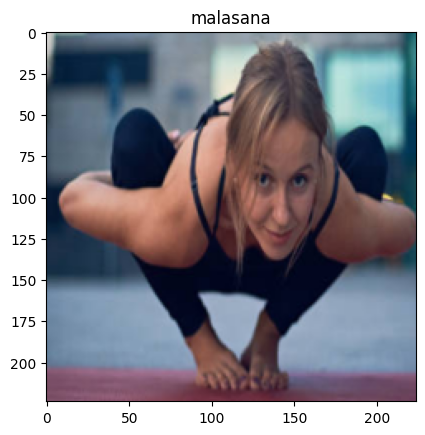

In [52]:
img = train_features[0]
label = train_labels[0]
plt.imshow(img.permute(1, 2, 0))
plt.title(classes[label])
# label = torch.argmax(label)
plt.show()

In [54]:
import torchvision
from torchvision import models
import torchvision.models.efficientnet as e
import torchvision.models.resnet as r

In [55]:
WEIGHTS = r.resnet50(pretrained=True)
WEIGHTS2 = e.efficientnet_b0(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most u

In [68]:
class YogaNet(nn.Module):
    def __init__(self, base_model, additional_dims, num_classes=82):
        super().__init__()
        self.base_model = base_model

        for p in self.base_model.parameters():
            p.requires_grad = False

        self.kpts = nn.Sequential(
            nn.Linear(additional_dims, additional_dims*2),
            nn.ReLU(inplace=True),
            nn.Linear(additional_dims*2, additional_dims)
        )
        # self.final = nn.Linear(additional_dims, num_classes)
        self.base_model.fc = nn.Linear(2048, num_classes)
        self.final = nn.Linear(num_classes + additional_dims, num_classes)
        for param in self.base_model.fc.parameters():
            param.requires_grad = True
        for param in self.final.parameters():
            param.requires_grad = True
        
    def forward(self, x1, x2):
        x1 = F.relu(self.base_model(x1))
        x2 = F.relu(self.kpts(x2))
        x = torch.cat((x1, x2), dim=1)
        output = F.relu(self.final(x))

        if self.training is not True:
            output = self.softmax_layer(output)

        return x1
    

In [69]:
model = YogaNet(WEIGHTS, additional_dims=51)

In [70]:
model.state_dict

<bound method Module.state_dict of YogaNet(
  (base_model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
      

In [73]:
loss_fn = nn.CrossEntropyLoss().to(device)
# change WEIGHTS to model
optimizer = optim.Adam(model.parameters(), lr= 0.1)
accuracy_fn = Accuracy(task='multiclass', num_classes=len(classes)).to(device)
f1 = F1Score(task='multiclass', num_classes=len(classes)).to(device)

In [74]:
model = model.to(device)

In [ ]:
EPOCHS = 10

train_losses, train_acc = 0, 0

for epoch in range(EPOCHS):
  for batch, (X1, X2, y)in enumerate(train_dataloader):
    X1 = X1.to(device)
    X2 = X2.to(device)
    y = y.to(device)
    # should change WEIGHTS to model
    model.train()

    # should change model to model
    y_pred = model(X1, X2)
    # print(y_pred[0])
    loss = loss_fn(y_pred, y)
    train_acc += accuracy_fn(y_pred.argmax(dim=1), y)
    train_losses += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if batch % 16 == 0:
      print(f'{train_losses} | {train_acc}')

  train_losses /= len(train_dataloader)
  train_acc /= len(train_dataloader)
  print(f' Train Loss: {train_losses:.4f} | Train Acc: {train_acc:.3f}')

4.454348087310791 | 0.0
1786.0880126953125 | 0.28125
1856.5958251953125 | 0.5
1927.1036376953125 | 0.65625
1997.6114501953125 | 0.875
2068.119140625 | 1.03125
2138.626953125 | 1.21875
 Train Loss: 20.8603 | Train Acc: 0.013
25.26704978942871 | 0.043870192021131516
95.77461242675781 | 0.23137019574642181
166.2821807861328 | 0.481370210647583
236.7897491455078 | 0.700120210647583
307.2971496582031 | 0.950120210647583
377.8044738769531 | 1.106370210647583
448.3117980957031 | 1.293870210647583
 Train Loss: 4.6073 | Train Acc: 0.013
9.014017105102539 | 0.043991539627313614
79.52157592773438 | 0.2627415359020233
150.02914428710938 | 0.5127415657043457
220.53671264648438 | 0.6377415657043457
291.0441589355469 | 0.9189915657043457
361.5514831542969 | 1.1064915657043457
432.0588073730469 | 1.2314915657043457
 Train Loss: 4.4510 | Train Acc: 0.013
8.857738494873047 | 0.04399270564317703
79.36529541015625 | 0.29399269819259644
149.87286376953125 | 0.45024269819259644
220.38043212890625 | 0.606492